# Final Project 
# Submittied By:Akhil Parashara 
# W1166146 
# aparashara@scu.edu


# Analysis to be presented:

How the grades of students affect based on their driniking habbits: The aim of this project is to correlate and find how the change in drinking consumption can be reflected on their grades.

In order to find that we will be using LinearRegression,Lasso Reagression and Ridge Regression as taught in the class

In [97]:
###Step-1: Getting the data and importing the libraries:

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
import scipy
import matplotlib.pyplot as plt



df_mat = pd.read_csv('/Users/akhil.parashara/Downloads/student-mat.csv')
df_por = pd.read_csv('/Users/akhil.parashara/Downloads/student-por.csv')
df_data=pd.concat([df_mat,df_por])


# Cleaning up the data and removing the duplicate and redundant 

The data in both Maths and Portugese have been merged above but there are some duplicates which we will be removing below.

In [72]:
df_data=df_data.drop_duplicates(["school","sex","age","address","famsize",\
                                 "Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])


# Finding the normalization of the Grades

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)

The purpose of this is to find if there is a pattern or not


In [76]:
grades=["G1","G2","G3"]
normal=[]
for i in grades:
    normal.append(scipy.stats.normaltest(df_data[i]))
                                        
for i in range(0,len(grades)):
    print(grades[i])
    print(normal[i])
    

G1
NormaltestResult(statistic=18.735074390192455, pvalue=8.5453584985236355e-05)
G2
NormaltestResult(statistic=32.321985664995381, pvalue=9.5800988610509447e-08)
G3
NormaltestResult(statistic=73.593966615348393, pvalue=1.0453776212925763e-16)


Looking at G1, it seems it is closest to normal varaiable which can also be seen from the graphs below

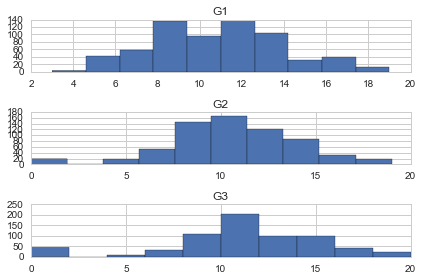

In [77]:
i = 1
for w in grades:
    plt.subplot(3, 1, i)
    plt.tight_layout()
    i += 1
    plt.hist(df_data[w])
    plt.title(w)

# Finding Coorelations between the grades

In [79]:
corr = df_data.corr()
for a in corr.columns:
    for b in corr.index:
        if (a != b) and (abs(corr[a][b]) >= 0.75):
            print(a,b,'--',corr[a][b])

('G1', 'G2', '--', 0.8414356603927251)
('G1', 'G3', '--', 0.7965691040425612)
('G2', 'G1', '--', 0.8414356603927251)
('G2', 'G3', '--', 0.91354807173107411)
('G3', 'G1', '--', 0.7965691040425612)
('G3', 'G2', '--', 0.91354807173107411)


From the above results, it looks like only G2-G3 have strong coorelation. 

# Regression 

Now We will first drop all the Grades (G1,G2,G3) because they are target


In [103]:
from sklearn.cross_validation import cross_val_score

In [104]:
def regrexp(y,drop):
    Y = df_data[y]
    X = df_data.drop(drop, axis=1)
    X = pd.get_dummies(X)

    models = ['LinearRegression', 'Ridge', 'Lasso']

    classif_list = [
            LinearRegression(),
            Ridge(),
            Lasso()]
            
    print('Models performance in: ' + str(y))
   
    for models, classif in zip(models, classif_list):
        print(models, end, ': ')
        print(cross_val_score(classif, X, Y, cv=5).mean())
        
a = ['G3','G2','G1']
for i in a:
    regression_explore(i, a)
    print('\n')

NameError: name 'regression_explore' is not defined

In [105]:
regression_explore?

Object `regression_explore` not found.
